In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2024-05-28 21:03:15.223058: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import tensorflow as tf
#gpu_available = tf.test.is_gpu_available()
#gpu_available

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
masks = C.Helper.load_seg_data(CAPATH)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13203, 512, 512, 1) (13203, 512, 512, 1) (3563, 512, 512, 1) (3563, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13203, 512, 512, 1) (3563, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13203, 512, 512, 1) (3563, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-05-28 21:06:45.977919: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-28 21:06:46.226175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-28 21:06:46.228794: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-28 21:06:46.229530: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-28 21:06:46.280539: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-28 

In [16]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-05-28 21:06:49.222096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-28 21:06:49.246766: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-05-28 21:06:50.957193: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-28 21:06:52.222640: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-05-28 21:06:53.836308: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-05-28 21:06:53.836330: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-05-28 21:06:53.837246: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-05-28 21:06:53.932088: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-28 21:06:55.387921: I tensorflow/stream_exec

671/671 [==============================] - 308s 437ms/step - loss: 0.0887 - iou: 3.5361e-05 - iou_thresholded: 0.3253 - val_loss: 0.0031 - val_iou: 1.0534e-04 - val_iou_thresholded: 0.8691
Epoch 2/200
671/671 [==============================] - 291s 433ms/step - loss: 0.0015 - iou: 2.4841e-04 - iou_thresholded: 0.4963 - val_loss: 7.8487e-04 - val_iou: 3.4231e-04 - val_iou_thresholded: 0.8853
Epoch 3/200
671/671 [==============================] - 291s 433ms/step - loss: 6.7592e-04 - iou: 5.6208e-04 - iou_thresholded: 0.4940 - val_loss: 3.8510e-04 - val_iou: 9.1314e-04 - val_iou_thresholded: 0.8058
Epoch 4/200
671/671 [==============================] - 291s 433ms/step - loss: 2.6991e-04 - iou: 0.0012 - iou_thresholded: 0.5269 - val_loss: 2.0647e-04 - val_iou: 0.0017 - val_iou_thresholded: 0.8481
Epoch 5/200
671/671 [==============================] - 291s 433ms/step - loss: 1.6514e-04 - iou: 0.0023 - iou_thresholded: 0.4871 - val_loss: 1.3230e-04 - val_iou: 0.0031 - val_iou_thresholded: 0.

671/671 [==============================] - 290s 433ms/step - loss: 1.9427e-05 - iou: 0.2040 - iou_thresholded: 0.5795 - val_loss: 2.6949e-05 - val_iou: 0.3857 - val_iou_thresholded: 0.8586
Epoch 42/200
671/671 [==============================] - 290s 433ms/step - loss: 1.8379e-05 - iou: 0.2110 - iou_thresholded: 0.6106 - val_loss: 2.8602e-05 - val_iou: 0.4042 - val_iou_thresholded: 0.8602
Epoch 43/200
671/671 [==============================] - 290s 433ms/step - loss: 1.7937e-05 - iou: 0.2237 - iou_thresholded: 0.6017 - val_loss: 3.0779e-05 - val_iou: 0.4829 - val_iou_thresholded: 0.8660
Epoch 44/200
671/671 [==============================] - 290s 433ms/step - loss: 1.7235e-05 - iou: 0.2324 - iou_thresholded: 0.6151 - val_loss: 3.0591e-05 - val_iou: 0.2637 - val_iou_thresholded: 0.8597
Epoch 45/200
671/671 [==============================] - 290s 433ms/step - loss: 1.7954e-05 - iou: 0.2326 - iou_thresholded: 0.6146 - val_loss: 3.8803e-05 - val_iou: 0.4801 - val_iou_thresholded: 0.8885
Epo

Epoch 82/200
671/671 [==============================] - 290s 432ms/step - loss: 7.3361e-06 - iou: 0.5040 - iou_thresholded: 0.7951 - val_loss: 4.1772e-05 - val_iou: 0.5950 - val_iou_thresholded: 0.8601
Epoch 83/200
671/671 [==============================] - 290s 432ms/step - loss: 7.5377e-06 - iou: 0.5229 - iou_thresholded: 0.7929 - val_loss: 3.4714e-05 - val_iou: 0.5037 - val_iou_thresholded: 0.8271
Epoch 84/200
671/671 [==============================] - 290s 433ms/step - loss: 7.4740e-06 - iou: 0.5071 - iou_thresholded: 0.7902 - val_loss: 3.0382e-05 - val_iou: 0.5262 - val_iou_thresholded: 0.7806
Epoch 85/200
671/671 [==============================] - 291s 433ms/step - loss: 7.1871e-06 - iou: 0.5086 - iou_thresholded: 0.7941 - val_loss: 4.3436e-05 - val_iou: 0.5486 - val_iou_thresholded: 0.8715
Epoch 86/200
671/671 [==============================] - 291s 433ms/step - loss: 7.4751e-06 - iou: 0.5045 - iou_thresholded: 0.8017 - val_loss: 3.6886e-05 - val_iou: 0.4511 - val_iou_thresholde

671/671 [==============================] - 292s 436ms/step - loss: 5.4591e-06 - iou: 0.5972 - iou_thresholded: 0.8510 - val_loss: 4.0477e-05 - val_iou: 0.6446 - val_iou_thresholded: 0.8666
Epoch 123/200
671/671 [==============================] - 290s 433ms/step - loss: 5.9855e-06 - iou: 0.5979 - iou_thresholded: 0.8362 - val_loss: 3.4268e-05 - val_iou: 0.6391 - val_iou_thresholded: 0.8480
Epoch 124/200
671/671 [==============================] - 291s 433ms/step - loss: 5.4209e-06 - iou: 0.6179 - iou_thresholded: 0.8502 - val_loss: 4.0206e-05 - val_iou: 0.5288 - val_iou_thresholded: 0.8637
Epoch 125/200
671/671 [==============================] - 290s 433ms/step - loss: 6.2496e-06 - iou: 0.5772 - iou_thresholded: 0.8366 - val_loss: 3.8813e-05 - val_iou: 0.6162 - val_iou_thresholded: 0.8446
Epoch 126/200
671/671 [==============================] - 290s 433ms/step - loss: 5.0908e-06 - iou: 0.6332 - iou_thresholded: 0.8628 - val_loss: 3.8173e-05 - val_iou: 0.5579 - val_iou_thresholded: 0.8182

671/671 [==============================] - 291s 433ms/step - loss: 4.3774e-06 - iou: 0.6798 - iou_thresholded: 0.8751 - val_loss: 5.3749e-05 - val_iou: 0.4980 - val_iou_thresholded: 0.8553
Epoch 163/200
671/671 [==============================] - 290s 433ms/step - loss: 4.0514e-06 - iou: 0.7128 - iou_thresholded: 0.8955 - val_loss: 5.0497e-05 - val_iou: 0.6687 - val_iou_thresholded: 0.8436
Epoch 164/200
671/671 [==============================] - 290s 433ms/step - loss: 4.1164e-06 - iou: 0.7155 - iou_thresholded: 0.8915 - val_loss: 5.3175e-05 - val_iou: 0.6035 - val_iou_thresholded: 0.8642
Epoch 165/200
671/671 [==============================] - 290s 433ms/step - loss: 4.0940e-06 - iou: 0.7412 - iou_thresholded: 0.8951 - val_loss: 5.0641e-05 - val_iou: 0.6037 - val_iou_thresholded: 0.8341
Epoch 166/200
671/671 [==============================] - 290s 433ms/step - loss: 3.9011e-06 - iou: 0.7073 - iou_thresholded: 0.9019 - val_loss: 4.9871e-05 - val_iou: 0.7650 - val_iou_thresholded: 0.8515

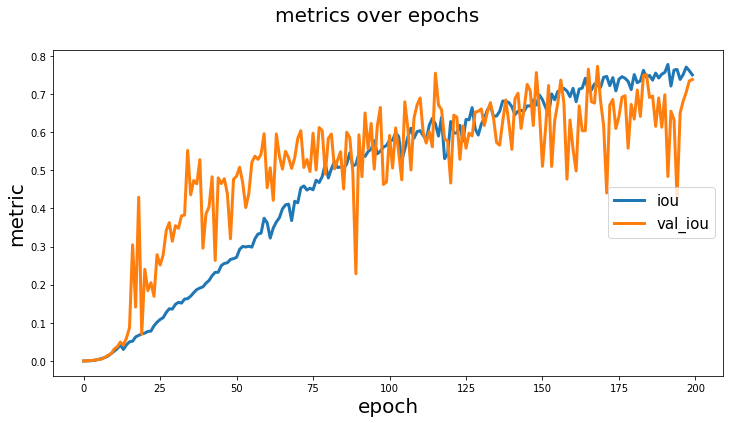

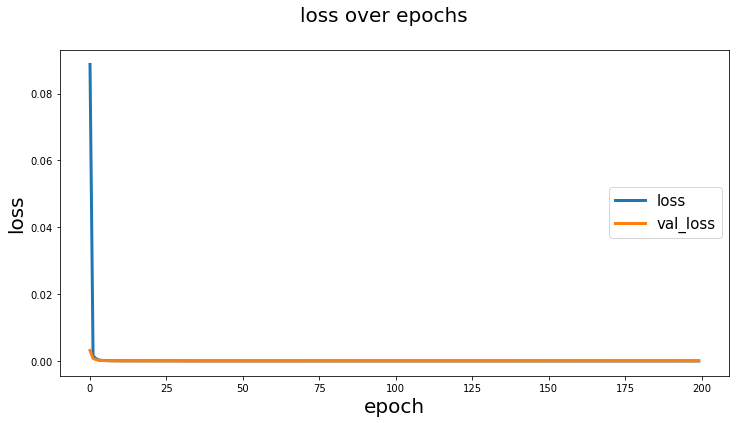

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(test_images_array, model)

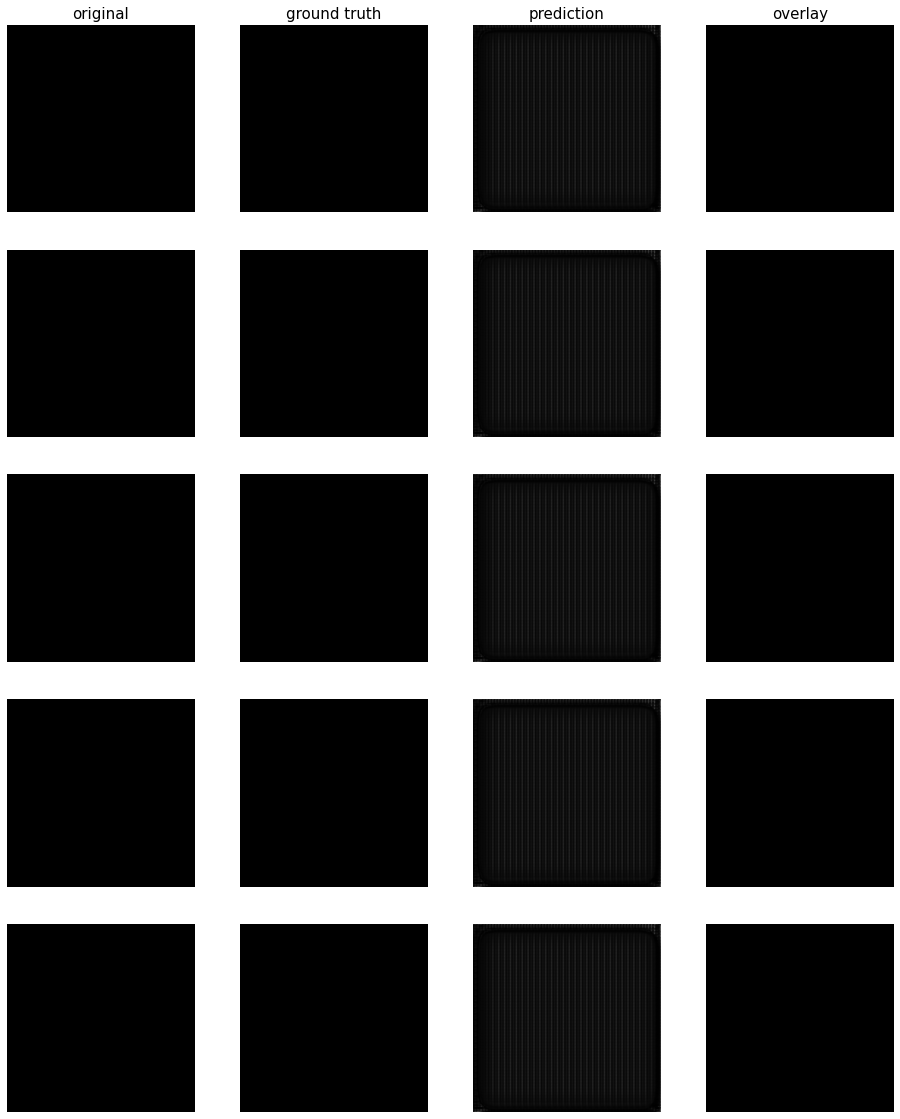

In [19]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

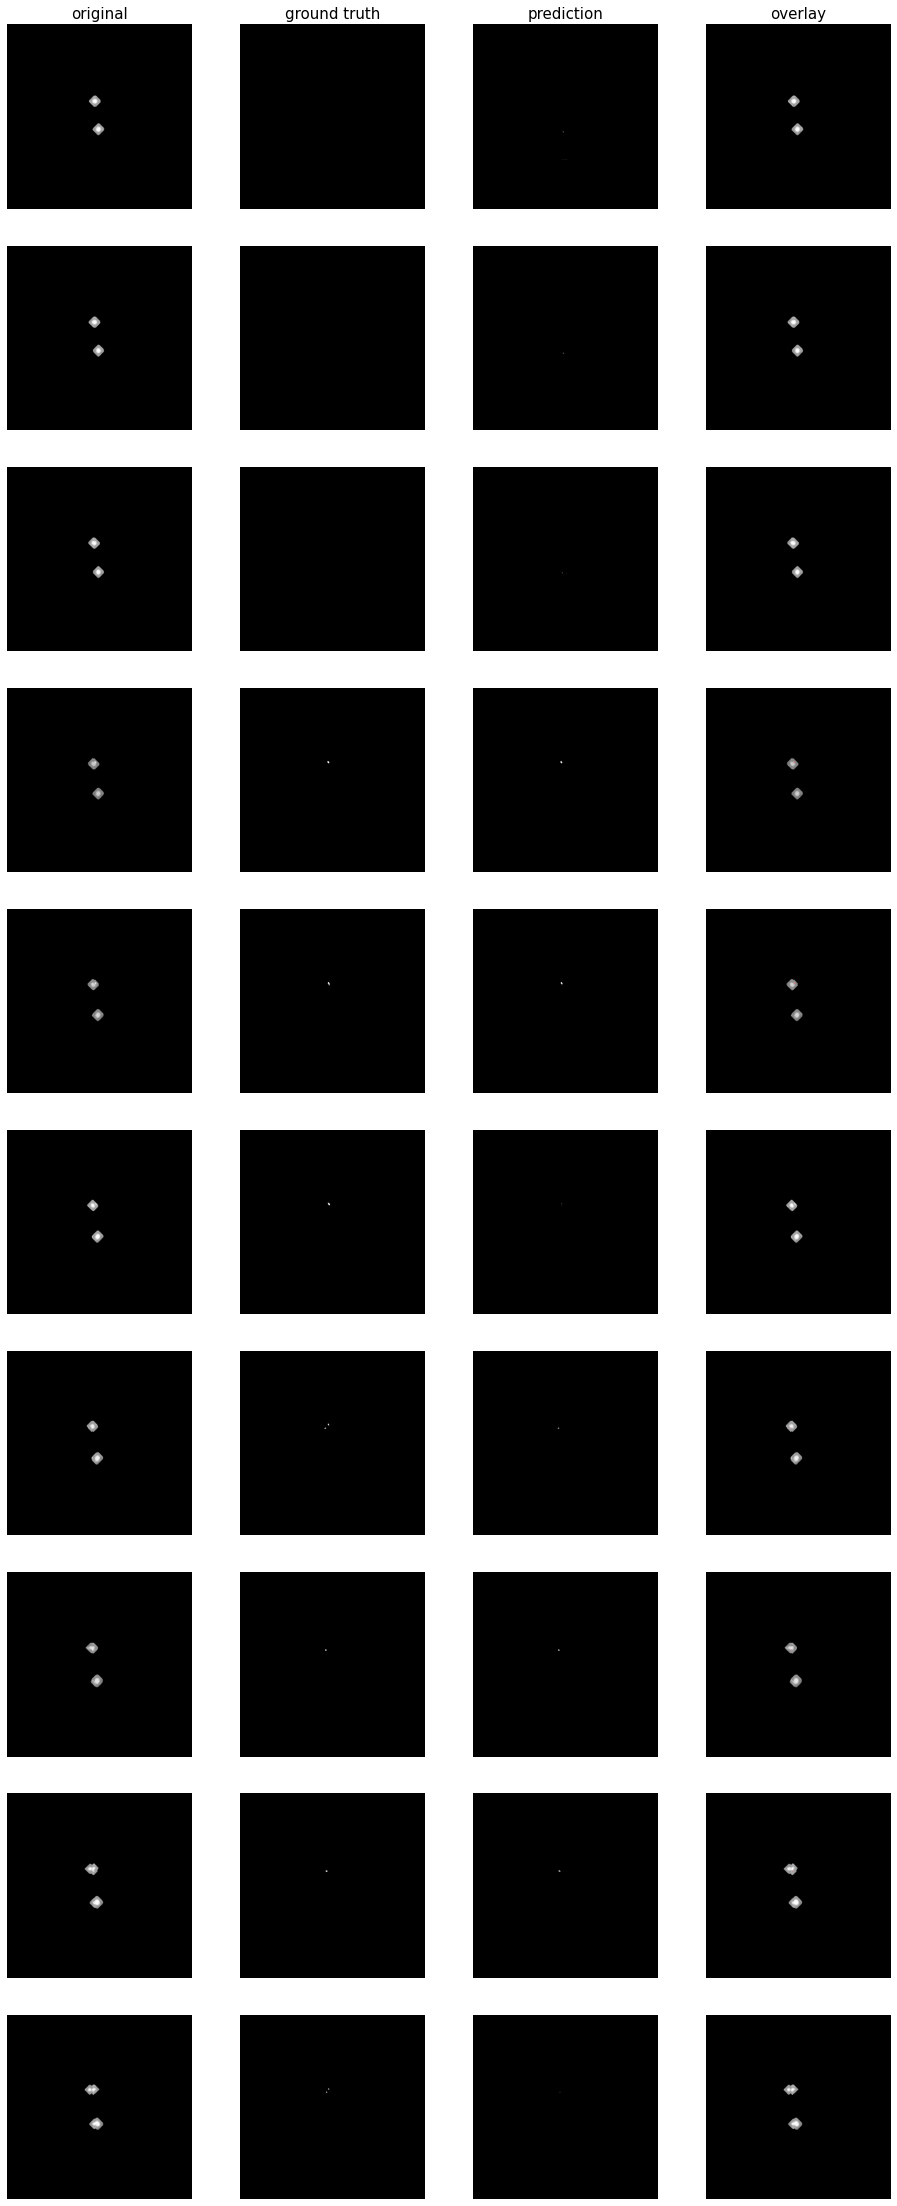

In [28]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=90, end_index=100)

In [21]:
C.Helper.evaluate(test_images_array, y_test, model)

112/112 [==============================] - 28s 252ms/step - loss: 9.5368e-05 - iou: 0.6081 - iou_thresholded: 0.7539


In [22]:
import pickle

In [23]:
with open('predictions_unet_v23.pkl', 'wb') as f:
    pickle.dump(y_pred, f)

In [24]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

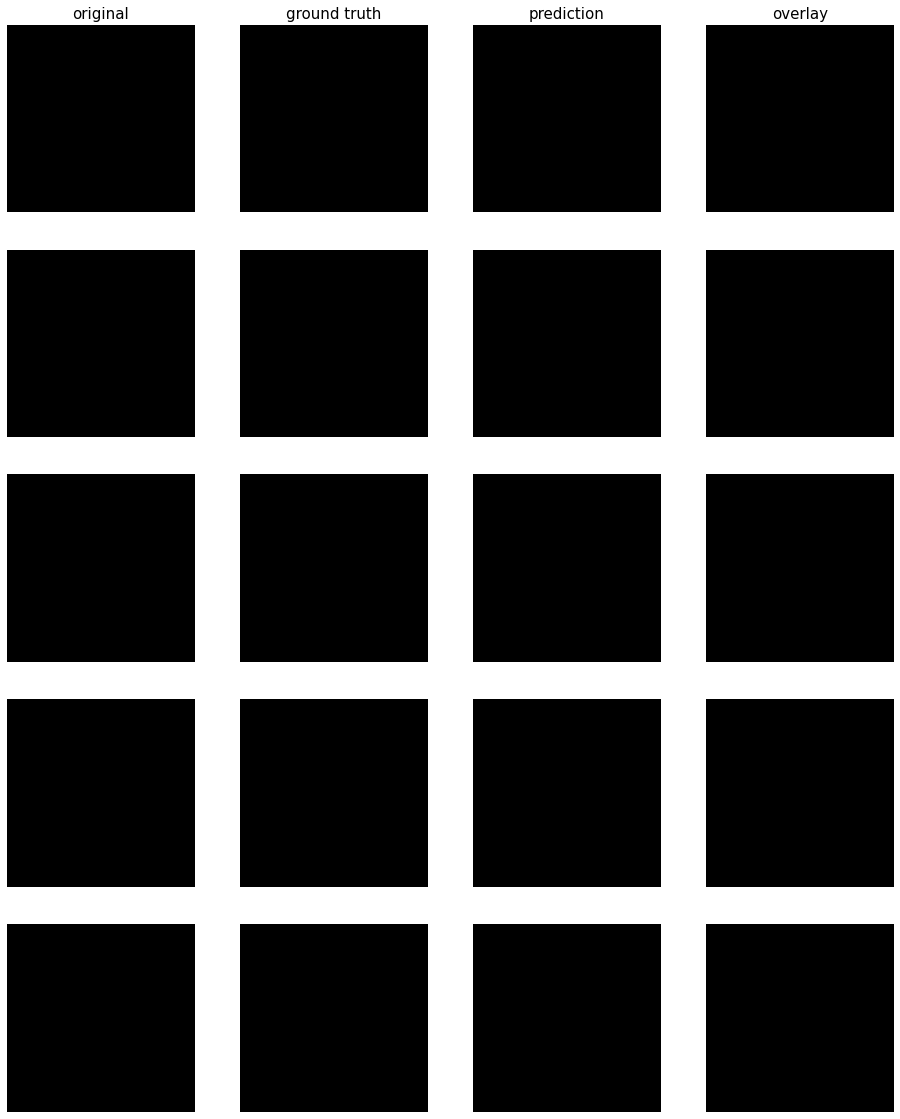

In [25]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

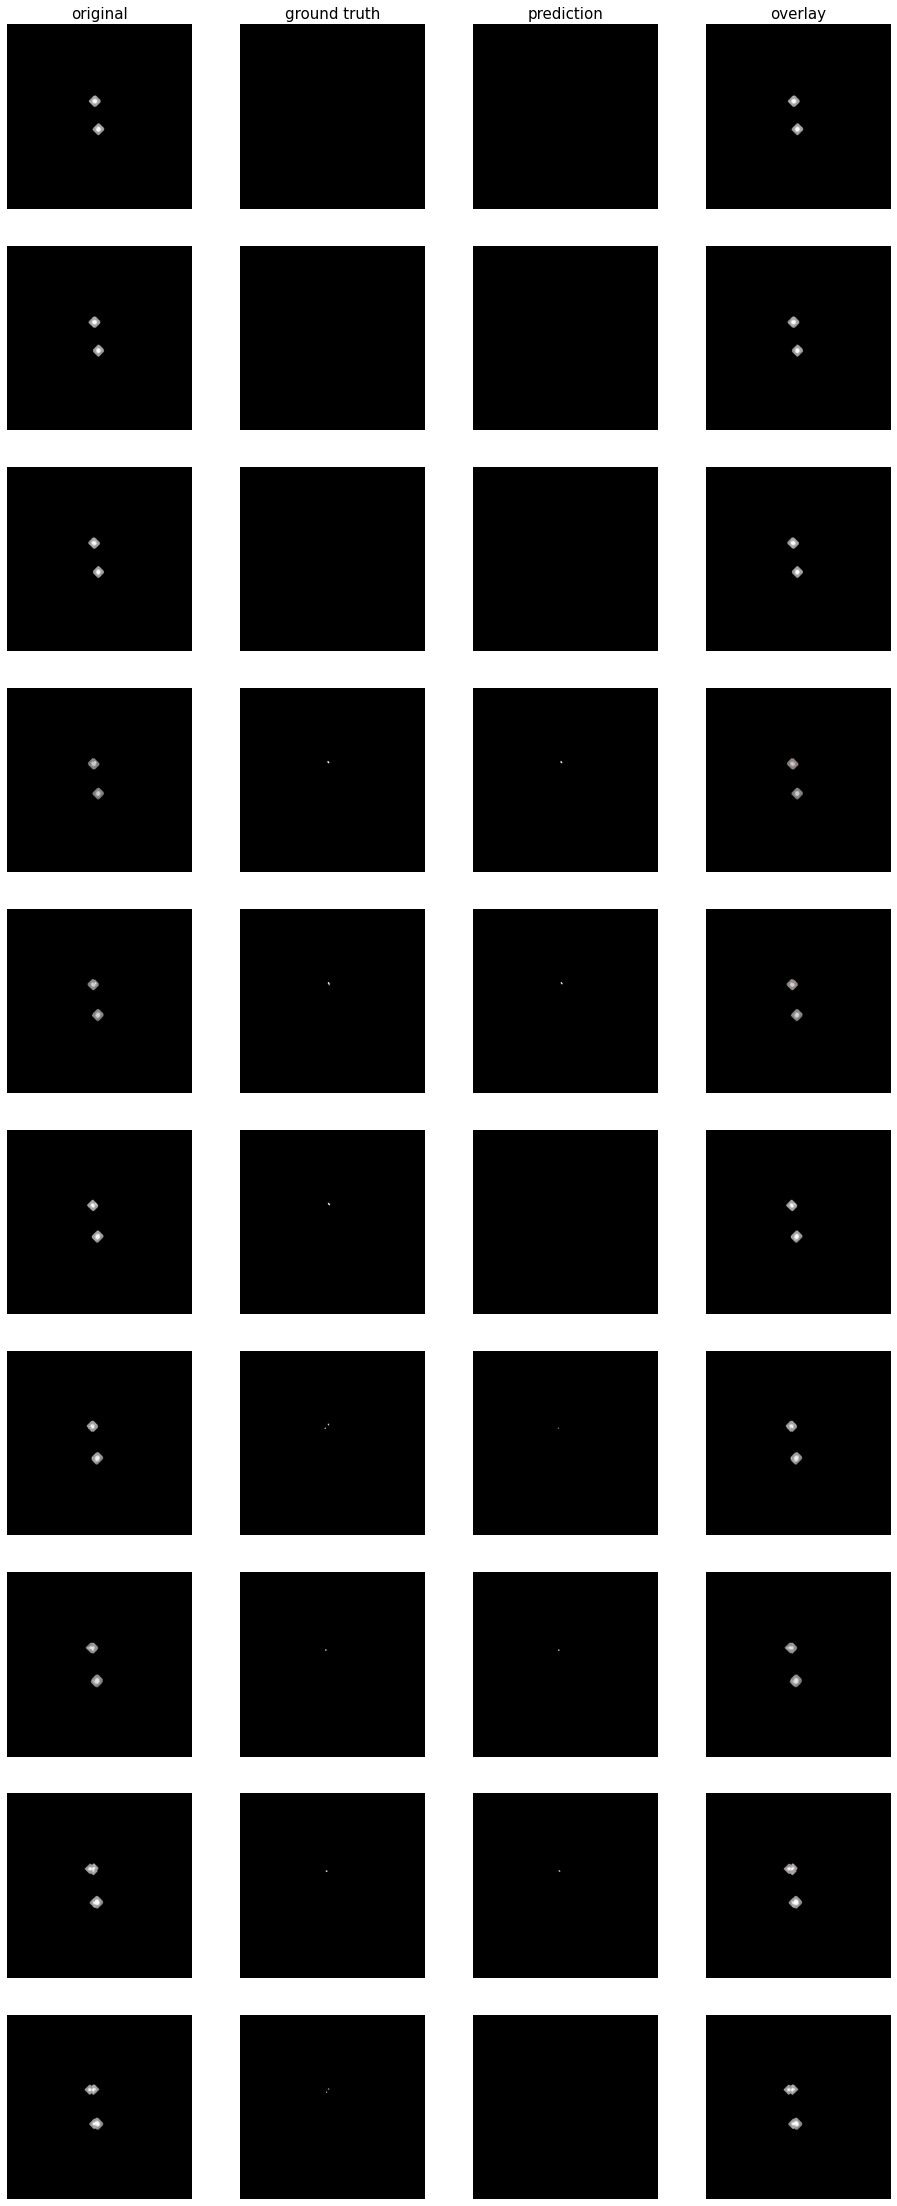

In [29]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=90, end_index=100)

In [27]:
C.Helper.evaluate(test_images_array, a_binary, model)

112/112 [==============================] - 28s 251ms/step - loss: 2.4769e-06 - iou: 0.7719 - iou_thresholded: 1.0000
